<a href="https://colab.research.google.com/github/melanieyes/flow-matching/blob/main/flow_matching_one_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Data

In [ ]:
import torch

# Ma trận số 1
image_1 = torch.tensor([
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0],
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

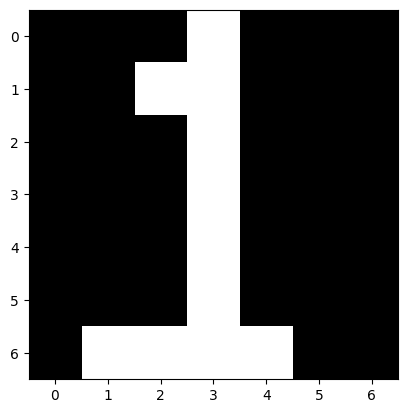

In [ ]:
plt.imshow(image_1[0][0], cmap='gray')
plt.show()

## Flow Matching

In [ ]:
sig_min = 0

## Model

In [ ]:
class Flow(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.time_embed = nn.Linear(1, 1)

    self.encoder = nn.Sequential(
        nn.Conv2d(1, 4, kernel_size=3, padding=1),
        nn.ELU(),
        nn.Conv2d(4, 4, kernel_size=3, padding=1),
        nn.ELU()
        )

    self.decoder = nn.ConvTranspose2d(4, 1, kernel_size=3, padding=1)

  def forward(self,  t: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
    t_embed = self.time_embed(t.unsqueeze(-1).float())  # [B, 1]
    t_embed = t_embed.view(-1, 1, 1, 1)
    inp = x  + t_embed
    x_encoded = self.encoder(inp)
    return self.decoder(x_encoded)

## Training

In [ ]:
# Khởi tạo model
model = Flow()

# Chuẩn bị optimizer và loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

In [ ]:
losses = []
steps = 5000

x_1 = image_1
for step in range(steps):
    optimizer.zero_grad()

    # Get x_0
    x_0 = torch.randn_like(x_1)

    # Get t
    t = torch.rand(1)

    # Target
    target = x_1 - (1 - sig_min) * x_0

    # Model predict
    x_t = (1 - (1-sig_min)*t) * x_0 + t*x_1
    pred = model(t, x_t)

    # Update
    loss = loss_fn(pred, target)
    loss.backward()
    optimizer.step()

    if step % 500 == 0:
        losses += [loss.detach()]
        print(f"Step: {step}, loss: {loss.item()}")

Step: 0, loss: 1.197877287864685
Step: 500, loss: 1.0048670768737793
Step: 1000, loss: 0.20431704819202423
Step: 1500, loss: 0.25637805461883545
Step: 2000, loss: 0.6305650472640991
Step: 2500, loss: 0.16052110493183136
Step: 3000, loss: 0.17869581282138824
Step: 3500, loss: 0.7532753348350525
Step: 4000, loss: 0.1401532143354416
Step: 4500, loss: 0.05142023041844368


## Sampling

In [ ]:
steps = 10
with torch.no_grad():
    x_0 = torch.randn_like(x_1)
    t = torch.zeros(1)
    delta = 1/steps
    x_t = x_0
    list_x_t = [x_t]
    for i in range(steps):
        x_t = x_t + delta*model(t, x_t)
        t = t + delta
        list_x_t.append(x_t)


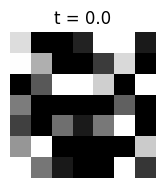

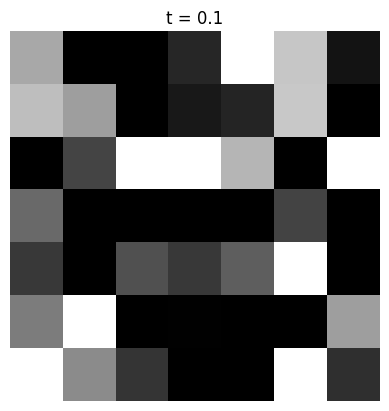

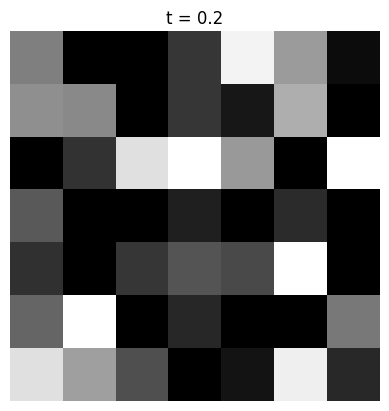

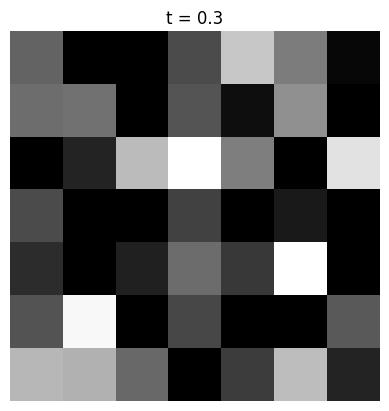

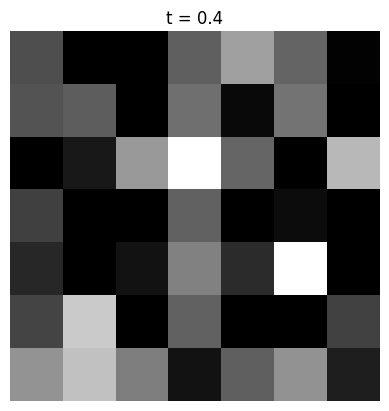

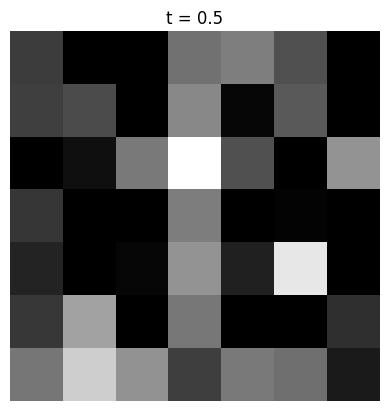

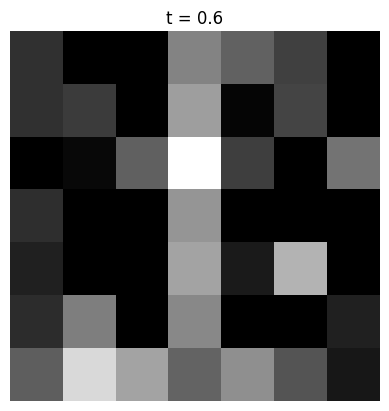

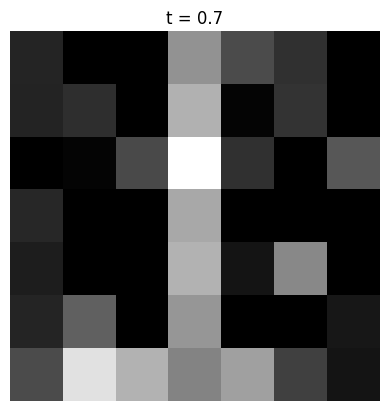

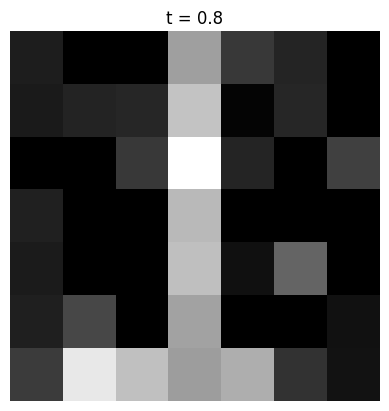

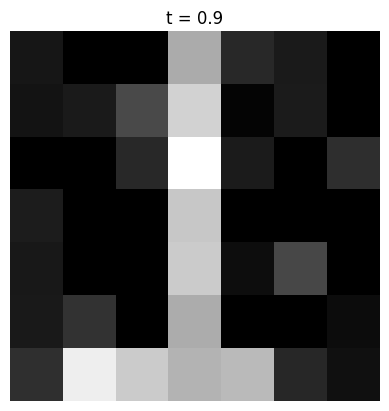

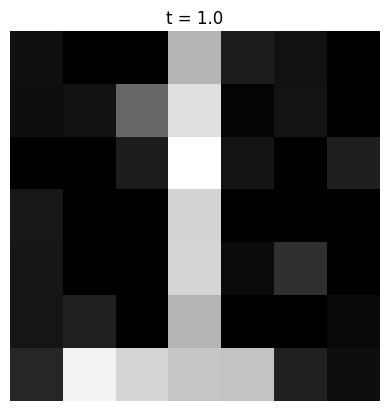

In [ ]:
plt.subplot(1, 3, 2)
for i, img in enumerate(list_x_t):
    plt.imshow(img.squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title(f't = {i/steps}')
    plt.axis('off')
    plt.show()

In [ ]:
list_x_t

[tensor([[[[ 0.8643, -0.8332, -0.9885,  0.1340,  1.3628,  1.0066,  0.1050],
           [ 0.9926,  0.6845, -2.4708, -0.0064,  0.2313,  0.8507, -1.6419],
           [-1.0018,  0.3458,  1.1970,  1.1255,  0.8101, -0.6811,  1.4712],
           [ 0.4875, -0.4885, -0.4574, -0.1883, -0.4639,  0.3777, -0.1766],
           [ 0.2537, -0.8608,  0.4342,  0.1041,  0.4722,  2.2885, -0.0089],
           [ 0.5897,  1.5954, -0.6731, -0.1663, -0.6586, -1.2145,  0.7936],
           [ 1.2661,  0.4627,  0.0992, -0.8430, -0.3408,  1.3975,  0.2147]]]]),
 tensor([[[[ 0.6576, -0.7329, -0.9083,  0.1508,  1.1472,  0.7749,  0.0749],
           [ 0.7451,  0.6199, -1.9952,  0.0976,  0.1484,  0.7831, -1.3808],
           [-0.8968,  0.2660,  1.0332,  1.1543,  0.7091, -0.6496,  1.2623],
           [ 0.4132, -0.3942, -0.4243, -0.0247, -0.4196,  0.2641, -0.1192],
           [ 0.2213, -0.7075,  0.3129,  0.2258,  0.3697,  1.9677, -0.0197],
           [ 0.4856,  1.3743, -0.5641,  0.0058, -0.5667, -1.0386,  0.6189],
        

(np.float64(-0.5), np.float64(6.5), np.float64(6.5), np.float64(-0.5))

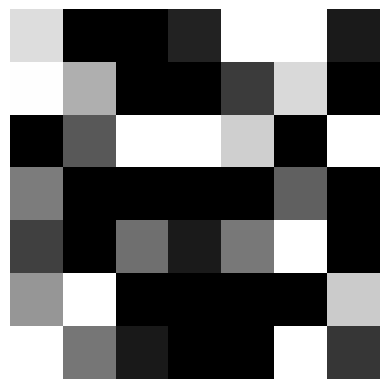

In [ ]:
plt.imshow(list_x_t[0].squeeze(), cmap='gray', vmin=0, vmax=1)
plt.axis('off')


(np.float64(-0.5), np.float64(6.5), np.float64(6.5), np.float64(-0.5))

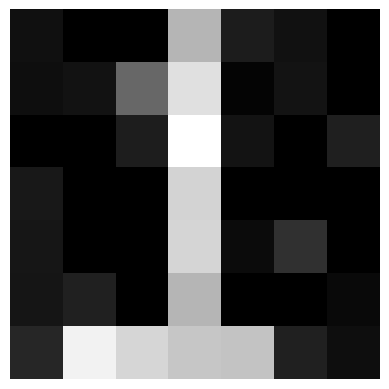

In [ ]:
plt.imshow(list_x_t[-1].squeeze(), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
